<a href="https://colab.research.google.com/github/andreidm92/computer_vision_tasks/blob/main/practice/Lesson_06_Color_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 6: Цветокоррекция и восстановление цвета


## 🎯 Цель
Изучить работу с цветовым пространством LAB и использовать CLAHE для улучшения контраста изображений.

---

## 📘 Теория

- Цветовое пространство **LAB**:
  - **L** — яркость
  - **A** — зелёный ↔ красный
  - **B** — синий ↔ жёлтый

- **CLAHE** (Contrast Limited Adaptive Histogram Equalization):
  - Повышает локальный контраст
  - Применяется к каналу яркости L

- Алгоритм:
  1. RGB → LAB
  2. CLAHE на L
  3. LAB → RGB


## 🔍 Подробно про цветовое пространство LAB

**CIELAB (или просто LAB)** — это цветовое пространство, созданное так, чтобы расстояния между цветами отражали восприятие человеком.

### Компоненты:
- **L (Lightness)** — Яркость: от 0 (черный) до 100 (белый)
- **A** — От зелёного к красному:
  - отрицательные значения — зелёный
  - положительные значения — красный
- **B** — От синего к жёлтому:
  - отрицательные значения — синий
  - положительные значения — жёлтый

### Почему LAB полезен:
- Отделение яркости (L) от цвета (A и B)
- Перцептивная метричность: расстояние между цветами в LAB ближе к человеческому восприятию
- Отлично подходит для задач цветокоррекции, сравнения, кластеризации цвета

### В OpenCV:
- L, A, B масштабированы в диапазон [0, 255]
- Значение 128 в A и B = "нейтрально"

Пример: A = 150 → немного красный, B = 100 → немного синий


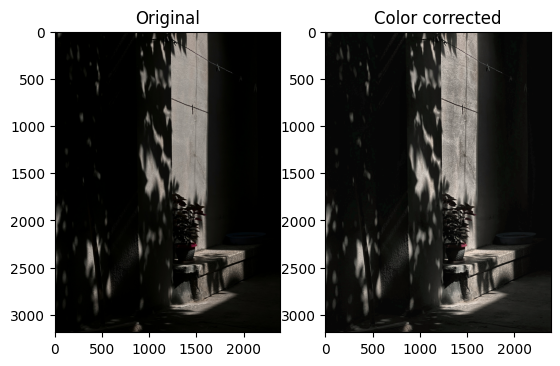

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Скачиваем изображение по ссылке
url = 'https://raw.githubusercontent.com/andreidm92/computer_vision_tasks/main/utils/sunlight.jpg'
resp = requests.get(url)
img_array = np.asarray(bytearray(resp.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Перевод в LAB
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)

# Объединение и обратное преобразование
limg = cv2.merge((cl, a, b))
final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

# Отображение
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Color corrected")
plt.imshow(final)
plt.show()


## 🧠 Упражнение

Пример ручного преобразования одного пикселя из RGB в LAB и обратно (с использованием OpenCV):

- [255, 0, 0] — чисто красный
- [0, 255, 0] — чисто зелёный
- [0, 0, 255] — чисто синий


In [6]:
import numpy as np

# Примеры пикселей
pixels = np.array([[[255, 0, 0],
                    [0, 255, 0],
                    [0, 0, 255]]], dtype=np.uint8)

# Преобразование RGB → LAB
pixels_lab = cv2.cvtColor(pixels, cv2.COLOR_RGB2LAB)
print("LAB:", pixels_lab)

# Обратно LAB → RGB
pixels_rgb = cv2.cvtColor(pixels_lab, cv2.COLOR_LAB2RGB)
print("RGB восстановленные:", pixels_rgb)

LAB: [[[136 208 195]
  [224  42 211]
  [ 82 207  20]]]
RGB восстановленные: [[[255   2   1]
  [  7 255   3]
  [  0   1 255]]]


✅ Твоя задача:
Возьми цвет [255, 0, 0] (чисто красный) и выполни вручную все шаги:

##1. Нормализуй RGB → [0, 1]

R, G, B = 255, 0, 0
R, G, B = R / 255, G / 255, B / 255

##2. Применить матрицу RGB → XYZ

X = R * 0.4124 + G * 0.3576 + B * 0.1805
Y = R * 0.2126 + G * 0.7152 + B * 0.0722
Z = R * 0.0193 + G * 0.1192 + B * 0.9505

## 📐 Матрица RGB → XYZ

Это **линейное преобразование**, переводящее RGB (аппаратно-зависимое пространство) в XYZ (независимое, стандартизированное пространство CIE).

---

### 🧭 Откуда берётся?

Зависит от:
- Цветового пространства (чаще всего sRGB)
- Цветовой температуры белой точки (обычно D65)
- Линейного RGB (значения без гамма-коррекции)

---

### 📊 Матрица (для sRGB и D65):

$$
\begin{bmatrix}
X \\
Y \\
Z \\
\end{bmatrix}
=
\begin{bmatrix}
0.4124 & 0.3576 & 0.1805 \\
0.2126 & 0.7152 & 0.0722 \\
0.0193 & 0.1192 & 0.9505 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
R \\
G \\
B \\
\end{bmatrix}
$$

где $R, G, B \in [0, 1]$ — линейные значения (не подвергшиеся гамма-коррекции).

---

### 🔁 Зачем это нужно?

- XYZ — переходное пространство для LAB
- LAB отражает восприятие человека
- XYZ используется в:
  - точной цветовой коррекции
  - калибровке дисплеев и камер
  - переводе между цветовыми пространствами


##3. Перевести XYZ → LAB с D65

Xn, Yn, Zn = 95.047, 100.000, 108.883
x, y, z = X / Xn, Y / Yn, Z / Zn

# функция f(t)
def f(t):
    return t**(1/3) if t > 0.008856 else 7.787 * t + 16/116

L = 116 * f(y) - 16
A = 500 * (f(x) - f(y))
B = 200 * (f(y) - f(z))


## 🔥 Что такое цветовая температура белой точки?
Цветовая температура описывает оттенок белого света, излучаемого идеальным чёрным телом при определённой температуре в кельвинах (K).

2700K — тёплый, жёлтый свет (лампа накаливания)

5000K — дневной нейтральный белый

6500K — холодный белый свет (пасмурный день, северное небо)

##⚪ Что такое белая точка?
Это эталонный "белый цвет", с которым сравниваются все остальные цвета в цветовом пространстве. Он определяет:

баланс белого,

точку нормализации в преобразованиях XYZ ↔ LAB,

калибровку камер и дисплеев.

##📘 D65 — стандартная белая точка
D65 — это стандарт CIE:

Цветовая температура: 6504 К

Смоделирован как дневной свет в полдень

Используется по умолчанию в большинстве систем (включая OpenCV и Photoshop)

📌 Зачем это нужно?
Когда ты преобразуешь из RGB в XYZ и далее в LAB, нужно знать, с каким "белым" ты сравниваешься.
Например, в LAB:

𝑋
𝑛
,
𝑌
𝑛
,
𝑍
𝑛
=
XYZ-координаты белой точки (например, D65)
X
n
​
 ,Y
n
​
 ,Z
n
​
 =XYZ-координаты белой точки (например, D65)
Только относительно этой точки можно корректно интерпретировать LAB-яркость и цветовой сдвиг.

🧠 Важно запомнить:
Белая точка задаёт "нулевое" смещение цвета.

D65 — основной стандарт в компьютерном зрении и графике.

Если источник света другой (например, лампа или закат), нужна другая белая точка.



## 🔄 Зачем нужна функция $f(t)$ при XYZ → LAB

Когда мы переходим от координат $X, Y, Z$ к $L, A, B$ в LAB, мы используем **нелинейную функцию $f(t)$**, чтобы смоделировать восприятие цвета человеком.

---

### 🧠 Причина:
Человеческий глаз **не воспринимает свет линейно**:
- В тёмных участках мы более чувствительны к изменению яркости
- Поэтому нужно компенсировать это при преобразовании

---

### 📐 Формула функции $f(t)$:

$$
f(t) =
\begin{cases}
t^{1/3}, & \text{если } t > 0.008856 \\\\
7.787 \cdot t + \frac{16}{116}, & \text{если } t \le 0.008856
\end{cases}
$$

---

### 🔁 Применение:

Для координат:

$$
x = \frac{X}{X_n}, \quad y = \frac{Y}{Y_n}, \quad z = \frac{Z}{Z_n}
$$

Итоговые значения LAB вычисляются как:

$$
L = 116 \cdot f(y) - 16 \\
A = 500 \cdot (f(x) - f(y)) \\
B = 200 \cdot (f(y) - f(z))
$$

---

### 📊 Визуализация функции $f(t)$:

<img src="/mnt/data/f_t_function_lab.png" width="600"/>

- Красная линия — порог $t = 0.008856$, где функция меняет поведение
- Для малых $t$ — линейное приближение
- Для больших $t$ — кубический корень

---

### ⚡ Вывод:
Функция $f(t)$ делает цветовое пространство LAB **перцептивно равномерным** — одинаковое изменение в LAB соответствует примерно одинаковому изменению в восприятии.
